In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import imblearn

In [2]:
cred=pd.read_csv(r'C:\CHINMAY\Documents\Credit Card Fraud Detection\creditcard.csv')
cred.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
print(cred.isnull().values.any())

False


No null values in the dataset.

0    0.998273
1    0.001727
Name: Class, dtype: float64 2


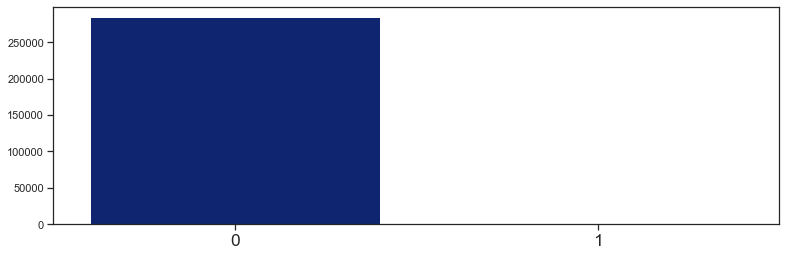

In [5]:
sns.set(style="ticks",rc={"figure.figsize":(13,4)},palette="dark")
cl=cred["Class"].value_counts()
sns.barplot(x=cl.index,y=cl.values)
plt.xticks(
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
print(round(cl,2)/len(cred),2)

As we can see above 99.83% of the transactions are classified as non-fraud. And from the above graph we can notice that how imbalanced is our datsaset, this can influence our model to be highly inaccurate thereby making incorrect predictions. But we need our model to correctly identify all the fraudelent transactions.

In [6]:
from dataprep.eda import plot, plot_correlation, plot_missing
plot(cred,"Time")

In [7]:
plot(cred,"Amount")

In [8]:
#Fraud and Non-fraudulent transactions
fraud=cred[cred["Class"]==1]
not_fraud=cred[cred["Class"]==0]

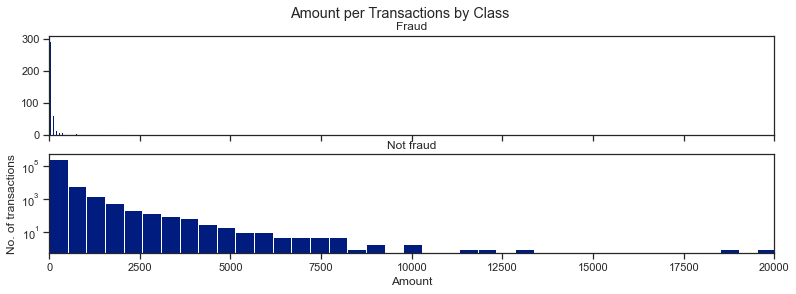

In [9]:
fig,ax=plt.subplots(2,1,sharex=True)
fig.suptitle("Amount per Transactions by Class")
ax[0].hist(fraud.Amount,bins=50)
ax[0].set_title("Fraud")
ax[1].hist(not_fraud.Amount,bins=50)
ax[1].set_title("Not fraud")
plt.xlim((0,20000))
plt.xlabel("Amount")
plt.ylabel("No. of transactions")
plt.yscale("log")
plt.show()

In [10]:
plot_correlation(cred)

In [11]:
from sklearn.preprocessing import RobustScaler

In [12]:
#Normalising amount and time column
cred["amount"] = RobustScaler().fit_transform(cred['Amount'].values.reshape(-1, 1))
cred["time"] = RobustScaler().fit_transform(cred['Time'].values.reshape(-1, 1))
cred.drop(['Time','Amount'],axis=1,inplace=True)
amount=cred["amount"]
time=cred["time"]
cred.drop(["amount","time"],axis=1, inplace=True)
cred.insert(0, 'amount', amount)
cred.insert(1, 'time', time)
cred.head()

,amount,time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [13]:
X = np.array(cred.iloc[:, cred.columns != 'Class'])
y = np.array(cred.iloc[:, cred.columns == 'Class'])

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

print(Xtrain.shape,Xtest.shape)
print(ytrain.shape,ytest.shape)

(199364, 30) (85443, 30)
(199364, 1) (85443, 1)


# Logistic regression with Undersampling

In [15]:
from imblearn.under_sampling import NearMiss
s = NearMiss()
X_res,y_res=s.fit_sample(Xtrain,ytrain)
print(X_res.shape,y_res.shape)


print("Before undersampling, counts of label '1': {}".format(sum(ytrain==1)))
print("Before undersampling, counts of label '0': {} \n".format(sum(ytrain==0)))
print("After undersampling, counts of label '1': {}".format(sum(y_res==1)/len(y_res)*100.0,2))
print("After undersampling, counts of label '0': {}".format(sum(y_res==0)/len(y_res)*100.0,2))

(690, 30) (690,)
Before undersampling, counts of label '1': [345]
Before undersampling, counts of label '0': [199019] 

After undersampling, counts of label '1': 50.0
After undersampling, counts of label '0': 50.0


              precision    recall  f1-score   support

   Non-fraud       1.00      0.57      0.73     85296
       Fraud       0.00      0.95      0.01       147

    accuracy                           0.57     85443
   macro avg       0.50      0.76      0.37     85443
weighted avg       1.00      0.57      0.73     85443



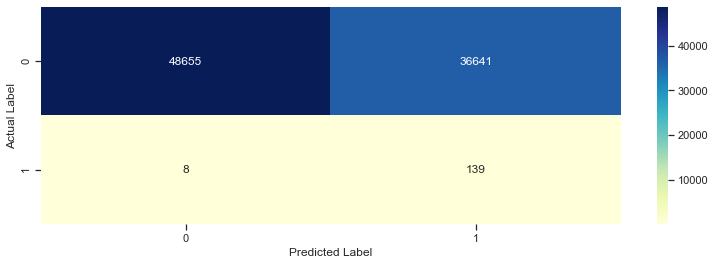

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score

log1=LogisticRegression()
log1.fit(X_res,y_res)
y_pred = log1.predict(Xtest)
confmat = confusion_matrix(ytest, y_pred)

sns.heatmap(pd.DataFrame(confmat), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-fraud', 'Fraud']
print(classification_report(ytest, y_pred, target_names=labels))

Text(0.5, 1.0, 'Precision-Recall Curve')

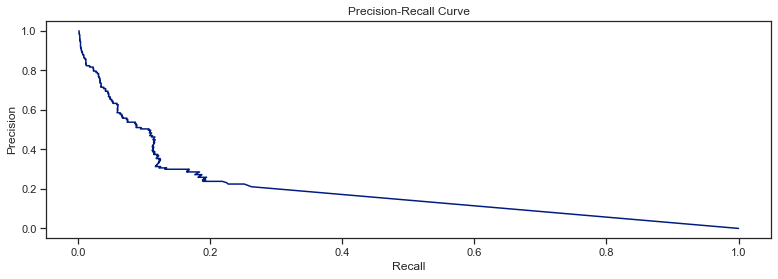

In [17]:
y_pred_prob = log1.predict_proba(Xtest)[:,1]
precision, recall, thresholds = precision_recall_curve(ytest, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Logistic regression with SMOTE(Oversampling)

In [18]:
from imblearn.over_sampling import SMOTE
s = SMOTE()
X_res,y_res=s.fit_sample(Xtrain,ytrain)
print(X_res.shape,y_res.shape)


print("Before oversampling, counts of label '1': {}".format(sum(ytrain==1)))
print("Before oversampling, counts of label '0': {} \n".format(sum(ytrain==0)))
print("After oversampling, counts of label '1': {}".format(sum(y_res==1)/len(y_res)*100.0,2))
print("After oversampling, counts of label '0': {}".format(sum(y_res==0)/len(y_res)*100.0,2))

(398038, 30) (398038,)
Before oversampling, counts of label '1': [345]
Before oversampling, counts of label '0': [199019] 

After oversampling, counts of label '1': 50.0
After oversampling, counts of label '0': 50.0


              precision    recall  f1-score   support

   Non-fraud       1.00      0.98      0.99     85296
       Fraud       0.06      0.92      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



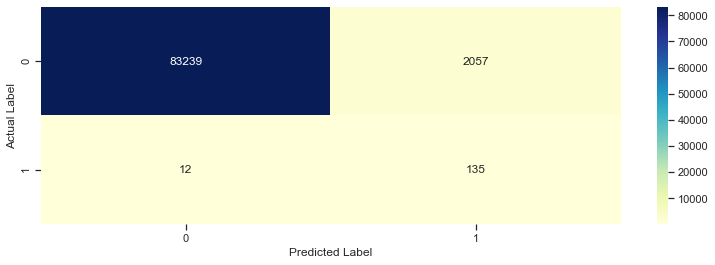

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score

log=LogisticRegression()
log.fit(X_res,y_res)
y_pred = log.predict(Xtest)
confmat = confusion_matrix(ytest, y_pred)

sns.heatmap(pd.DataFrame(confmat), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-fraud', 'Fraud']
print(classification_report(ytest, y_pred, target_names=labels))

Text(0.5, 1.0, 'Precision-Recall Curve')

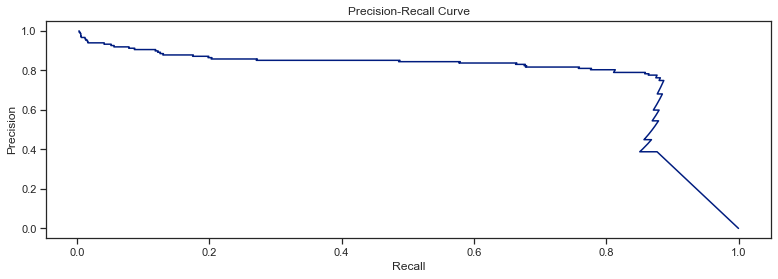

In [20]:
y_pred_prob = log.predict_proba(Xtest)[:,1]
precision, recall, thresholds = precision_recall_curve(ytest, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# RandomForest Classifier with SMOTE

In [21]:
from sklearn.ensemble import RandomForestClassifier as rfc
rf = rfc(n_estimators=500, min_samples_split=10, min_samples_leaf=1,
           max_features='auto', max_leaf_nodes=None,
           oob_score=True, n_jobs=-1, random_state=1)
rf.fit(X_res, y_res)
y_pred = rf.predict(Xtest)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.81      0.87       147

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



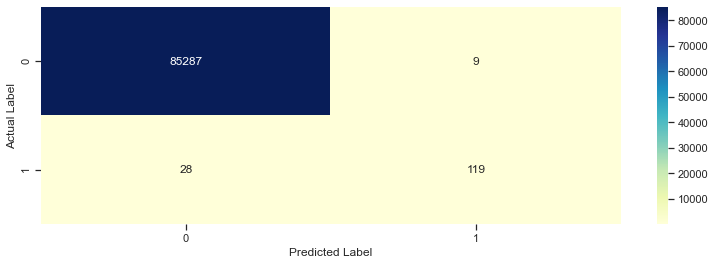

In [22]:
confmat = confusion_matrix(ytest, y_pred)
sns.heatmap(pd.DataFrame(confmat), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(ytest, y_pred))

Text(0.5, 1.0, 'Precision-Recall Curve')

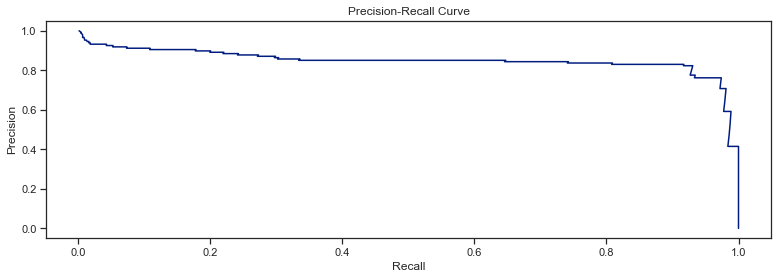

In [23]:
y_pred_prob = rf.predict_proba(Xtest)[:,1]
precision, recall, thresholds = precision_recall_curve(ytest, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')